In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly as py
import math as math
import plotly.plotly as ply
import plotly.graph_objs as go
import glob

In [2]:
#Load the files
df=pd.concat( [pd.read_csv(f, compression="gzip", header=None, usecols=[0,3]) for f in glob.glob("C:\susan\cloud\clusterdata-2011-2\job_events\part-00*.csv.gz")])
df.columns=[ 'timestamp', 'event_type']
df.shape

(2012242, 2)

In [3]:
#Covert the timestamp to days
df.loc[: ,'timestamp'] /= (24*60*60*1000*1000)
df['timestamp']=np.ceil(df['timestamp'])
df.shape
#df= df.sort_values(['Timestamp'], ascending=False)
# eventFreqDf.iloc[0:7, 0]=np.floor(eventFreqDf.iloc[0:7, 0].values)
 #eventFreqDf['Timestamp']=np.ceil(eventFreqDf['Timestamp'])

(2012242, 2)

In [4]:
df=df[(df.timestamp != 0)]
df=df[(df.timestamp != 30)]
df.shape

(2003983, 2)

In [5]:
#Take all data related to Schedule,Fail,Kill,Finish events
df=df[(df.event_type == 1) | (df.event_type == 3) | (df.event_type == 4) | (df.event_type == 5)]
df.shape

(1335948, 2)

C:\susan\tools\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



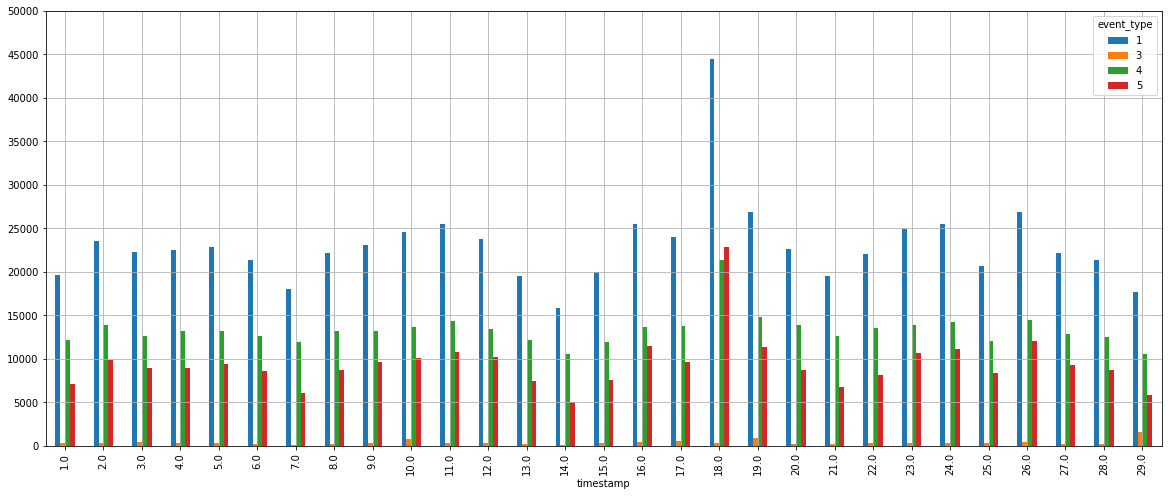

In [7]:
#Plot the graph
x_axis=list(range(1,30))
y_axis=list(range(0,55000,5000))
jobEventGrp=df.groupby(['timestamp','event_type']).size().unstack().plot(kind='bar',grid="true",xticks=x_axis,yticks=y_axis,figsize=(20,8))
jobEventGrp